## KNN


### Tải dữ liệu

In [431]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [432]:
import warnings
warnings.filterwarnings('ignore')

In [433]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [434]:
path = '/content/drive/MyDrive/MachineLearning/data/preprocessed_data.csv'
df = pd.read_csv(path)
df.head()

,Battery capacity,Screen size,Resolution x,Resolution y,Storage,Rear camera,Front camera,RAM,Price_log,SIM_2,4G_Yes,CPU_4_6,CPU_8_10,OSs_Other,OSs_iOS
0,4085,6.67,1440,3120,256.0,48.0,16.0,12.0,6.476939,1,1,0,1,0,0
1,4000,6.50,1080,2400,64.0,64.0,16.0,6.0,5.733306,1,1,0,1,0,0
2,3110,6.10,828,1792,64.0,12.0,12.0,4.0,6.540886,1,1,1,0,0,1
3,4000,6.40,1080,2340,128.0,12.0,32.0,6.0,6.311535,0,0,0,1,0,0
4,3800,6.55,1080,2400,128.0,48.0,16.0,8.0,5.953841,1,1,0,1,0,0


In [435]:
df.columns

Index(['Battery capacity', 'Screen size', 'Resolution x', 'Resolution y',
       'Storage', 'Rear camera', 'Front camera', 'RAM', 'Price_log', 'SIM_2',
       '4G_Yes', 'CPU_4_6', 'CPU_8_10', 'OSs_Other', 'OSs_iOS'],
      dtype='object')

In [436]:
df.describe()

,Battery capacity,Screen size,Resolution x,Resolution y,Storage,Rear camera,Front camera,RAM,Price_log,SIM_2,4G_Yes,CPU_4_6,CPU_8_10,OSs_Other,OSs_iOS
count,1349.000000,1349.000000,1349.000000,1349.000000,1349.000000,1349.000000,1349.000000,1349.000000,1349.000000,1349.000000,1349.000000,1349.000000,1349.000000,1349.000000,1349.000000
mean,2932.180875,5.283640,808.260934,1483.480356,29.814648,11.993625,6.998962,2.458302,4.483892,0.833210,0.743514,0.518162,0.417346,0.031134,0.011119
std,871.867999,0.665961,268.198554,550.919076,33.419657,8.590219,6.249636,1.597354,0.725734,0.372927,0.436855,0.499855,0.493304,0.173745,0.104899
min,1010.000000,2.400000,240.000000,320.000000,0.064000,0.000000,0.000000,0.064000,2.479391,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2300.000000,5.000000,720.000000,1280.000000,8.000000,8.000000,2.000000,1.000000,3.974998,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2942.000000,5.200000,720.000000,1280.000000,16.000000,12.200000,5.000000,2.000000,4.356568,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,3500.000000,5.670000,1080.000000,1920.000000,32.000000,13.000000,8.000000,3.000000,4.890266,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,6000.000000,7.000000,2160.000000,3840.000000,256.000000,64.000000,48.000000,12.000000,6.746752,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [437]:
# Selecting categorical and numerical columns to scale
bin_cols = ['SIM_2', '4G_Yes', 'CPU_4_6', 'CPU_8_10', 'OSs_Other', 'OSs_iOS']

num_cols = ['Battery capacity', 'Screen size', 'Resolution x', 'Resolution y',
       'Storage', 'Rear camera', 'Front camera', 'RAM']

In [438]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [439]:
y = df['Price_log']
X = df.drop('Price_log', axis=1)

### Làm với dữ liệu gốc

#### train:validation = 4:1

In [440]:
X_train, X_test, y_train, y_test = train_test_split(
  X,
  y,
  test_size=0.2,
  random_state=42
)

In [441]:
scaler = StandardScaler()
X_train.loc[:, num_cols] = scaler.fit_transform(X_train[num_cols])
X_test.loc[:, num_cols] = scaler.transform(X_test[num_cols])


In [442]:
X_train.head()

,Battery capacity,Screen size,Resolution x,Resolution y,Storage,Rear camera,Front camera,RAM,SIM_2,4G_Yes,CPU_4_6,CPU_8_10,OSs_Other,OSs_iOS
755,-0.849796,-0.423373,-0.327058,-0.364635,-0.671803,-0.802510,-0.799026,-0.923290,0,0,1,0,0,0
109,0.973484,1.509278,1.016567,1.331645,3.005054,1.370696,2.673564,2.216332,1,1,0,1,0,0
1040,-1.647481,-1.910027,-1.222808,-1.230821,-0.671803,-0.802510,-1.067363,-0.923290,1,1,1,0,1,0
548,-1.020728,-0.720703,-0.327058,-0.364635,-0.426679,-0.459372,-0.325491,-0.923290,0,0,0,1,0,0
1341,-1.020728,-0.423373,-0.327058,-0.364635,-0.426679,0.112524,-0.325491,-0.295366,1,0,0,1,0,0


In [443]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': range(1, 51)
}

grid_search = GridSearchCV(
    estimator=KNeighborsRegressor(),
    param_grid=param_grid,
    cv=5,               # 5-fold cross-validation
    scoring='r2',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

best_k = grid_search.best_params_['n_neighbors']

print("K tối ưu:", best_k)
print("Điểm R² trung bình (CV):", grid_search.best_score_)


K tối ưu: 9
Điểm R² trung bình (CV): 0.5975018119520762


In [444]:
knn = KNeighborsRegressor(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_test_pred = knn.predict(X_test)
y_train_pred = knn.predict(X_train)

In [445]:
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

mse_train = mean_squared_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print('MSE test: ', mse_test)
print('MAE test: ', mae_test)
print('R2 test: ', r2_test)
print()
print('MSE train: ', mse_train)
print('MAE train: ', mae_train)
print('R2 train: ', r2_train)

MSE test:  0.24077367825759435
MAE test:  0.36553067291219526
R2 test:  0.578338753360167

MSE train:  0.16049516013963497
MAE train:  0.2971119275465267
R2 train:  0.6884239118247002


In [446]:
residuals = y_test - y_test_pred

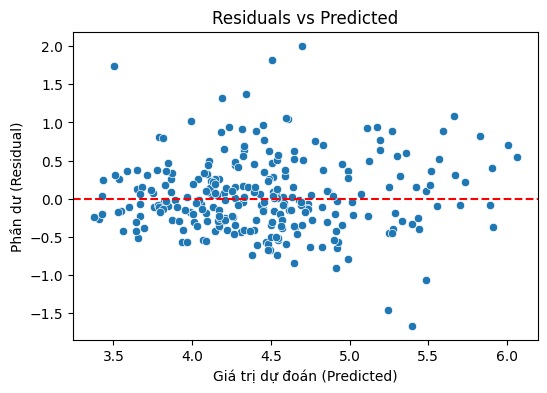

In [447]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=y_test_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Giá trị dự đoán (Predicted)")
plt.ylabel("Phần dư (Residual)")
plt.title("Residuals vs Predicted")
plt.show()

#### train:validation = 7:3

In [448]:
X_train, X_test, y_train, y_test = train_test_split(
  X,
  y,
  test_size=0.3,
  random_state=42
)

In [449]:
scaler = StandardScaler()
X_train.loc[:, num_cols] = scaler.fit_transform(X_train[num_cols])
X_test.loc[:, num_cols] = scaler.transform(X_test[num_cols])


In [450]:
X_train.head()

,Battery capacity,Screen size,Resolution x,Resolution y,Storage,Rear camera,Front camera,RAM,SIM_2,4G_Yes,CPU_4_6,CPU_8_10,OSs_Other,OSs_iOS
12,1.268199,1.930373,1.019011,1.541668,2.895170,4.025545,1.385311,2.171656,1,1,0,1,0,0
538,-0.169957,-0.435619,-0.330626,-0.366696,-0.436787,-0.464339,-0.792301,-0.304942,0,1,0,0,1,0
171,0.057420,-0.139870,1.019011,0.785524,0.991195,1.219368,0.918680,0.933357,1,1,0,1,0,0
596,0.057420,-0.435619,-0.330626,-0.366696,-0.436787,-0.464339,-0.325670,-0.304942,1,1,1,0,0,0
1237,-0.852086,-0.435619,-0.330626,-0.366696,-0.674784,-0.464339,-0.325670,-0.924092,1,0,0,1,0,0


In [451]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': range(1, 51)
}

grid_search = GridSearchCV(
    estimator=KNeighborsRegressor(),
    param_grid=param_grid,
    cv=5,               # 5-fold cross-validation
    scoring='r2',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

best_k = grid_search.best_params_['n_neighbors']

print("K tối ưu:", best_k)
print("Điểm R² trung bình (CV):", grid_search.best_score_)


K tối ưu: 7
Điểm R² trung bình (CV): 0.5900111685282919


In [452]:
knn = KNeighborsRegressor(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_test_pred = knn.predict(X_test)
y_train_pred = knn.predict(X_train)

In [453]:
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

mse_train = mean_squared_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print('MSE test: ', mse_test)
print('MAE test: ', mae_test)
print('R2 test: ', r2_test)
print()
print('MSE train: ', mse_train)
print('MAE train: ', mae_train)
print('R2 train: ', r2_train)

MSE test:  0.21567929955552015
MAE test:  0.34593043726264705
R2 test:  0.5895469230624789

MSE train:  0.15649149306192947
MAE train:  0.2932921174095299
R2 train:  0.7026173536793072


#### train:validation = 6:4

In [454]:
X_train, X_test, y_train, y_test = train_test_split(
  X,
  y,
  test_size=0.4,
  random_state=42
)

In [455]:
scaler = StandardScaler()
X_train.loc[:, num_cols] = scaler.fit_transform(X_train[num_cols])
X_test.loc[:, num_cols] = scaler.transform(X_test[num_cols])


In [456]:
X_train.head()

,Battery capacity,Screen size,Resolution x,Resolution y,Storage,Rear camera,Front camera,RAM,SIM_2,4G_Yes,CPU_4_6,CPU_8_10,OSs_Other,OSs_iOS
561,-0.515191,-0.436923,-1.013907,-0.955511,-0.684736,-0.808761,-0.936629,-0.938496,0,0,0,0,1,0
27,2.340582,1.033951,0.966728,1.180575,0.039392,0.088661,0.143141,0.298056,1,1,0,1,0,0
941,-1.086346,-1.179788,-1.233978,-1.144199,-0.684736,-0.808761,-0.795789,-0.938496,1,0,1,0,0,0
708,0.398656,1.345955,0.966728,1.180575,0.039392,0.425194,-0.326324,0.298056,0,0,0,1,0,0
554,-1.200577,-0.436923,-1.013907,-0.955511,-0.684736,-0.472228,-0.795789,-0.938496,1,0,0,1,0,0


In [457]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': range(1, 51)
}

grid_search = GridSearchCV(
    estimator=KNeighborsRegressor(),
    param_grid=param_grid,
    cv=5,               # 5-fold cross-validation
    scoring='r2',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

best_k = grid_search.best_params_['n_neighbors']

print("K tối ưu:", best_k)
print("Điểm R² trung bình (CV):", grid_search.best_score_)


K tối ưu: 15
Điểm R² trung bình (CV): 0.5710924345717052


In [458]:
knn = KNeighborsRegressor(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_test_pred = knn.predict(X_test)
y_train_pred = knn.predict(X_train)

In [459]:
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

mse_train = mean_squared_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print('MSE test: ', mse_test)
print('MAE test: ', mae_test)
print('R2 test: ', r2_test)
print()
print('MSE train: ', mse_train)
print('MAE train: ', mae_train)
print('R2 train: ', r2_train)

MSE test:  0.21961845296018395
MAE test:  0.34407219164830816
R2 test:  0.5900050891946789

MSE train:  0.1872313310714976
MAE train:  0.31888441392211453
R2 train:  0.6399131441103805


bảng 1 : mỗi phương pháp từng train test split


### Làm với dữ liệu giảm chiều

#### Giảm còn 6 chiều

##### train:validation = 4:1

In [460]:
X_train, X_test, y_train, y_test = train_test_split(
  X,
  y,
  test_size=0.2,
  random_state=42
)

In [461]:
scaler = StandardScaler()
X_train.loc[:, num_cols] = scaler.fit_transform(X_train[num_cols])
X_test.loc[:, num_cols] = scaler.transform(X_test[num_cols])


In [462]:
pca = PCA(n_components=6)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [463]:
# X_train.head()

In [464]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': range(1, 51)
}

grid_search = GridSearchCV(
    estimator=KNeighborsRegressor(),
    param_grid=param_grid,
    cv=5,               # 5-fold cross-validation
    scoring='r2',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

best_k = grid_search.best_params_['n_neighbors']

print("K tối ưu:", best_k)
print("Điểm R² trung bình (CV):", grid_search.best_score_)


K tối ưu: 14
Điểm R² trung bình (CV): 0.5791723517339129


In [465]:
knn = KNeighborsRegressor(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_test_pred = knn.predict(X_test)
y_train_pred = knn.predict(X_train)

In [466]:
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

mse_train = mean_squared_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print('MSE test: ', mse_test)
print('MAE test: ', mae_test)
print('R2 test: ', r2_test)
print()
print('MSE train: ', mse_train)
print('MAE train: ', mae_train)
print('R2 train: ', r2_train)

MSE test:  0.24426037450033075
MAE test:  0.3731746608742053
R2 test:  0.5722325847166256

MSE train:  0.18270374248928212
MAE train:  0.3150841266190819
R2 train:  0.6453094452800283


##### train:validation = 7:3

In [467]:
X_train, X_test, y_train, y_test = train_test_split(
  X,
  y,
  test_size=0.3,
  random_state=42
)

In [468]:
scaler = StandardScaler()
X_train.loc[:, num_cols] = scaler.fit_transform(X_train[num_cols])
X_test.loc[:, num_cols] = scaler.transform(X_test[num_cols])


In [469]:
pca = PCA(n_components=6)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [470]:
# X_train.head()

In [471]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': range(1, 51)
}

grid_search = GridSearchCV(
    estimator=KNeighborsRegressor(),
    param_grid=param_grid,
    cv=5,               # 5-fold cross-validation
    scoring='r2',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

best_k = grid_search.best_params_['n_neighbors']

print("K tối ưu:", best_k)
print("Điểm R² trung bình (CV):", grid_search.best_score_)


K tối ưu: 18
Điểm R² trung bình (CV): 0.5794933856110674


In [472]:
knn = KNeighborsRegressor(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_test_pred = knn.predict(X_test)
y_train_pred = knn.predict(X_train)

In [473]:
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

mse_train = mean_squared_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print('MSE test: ', mse_test)
print('MAE test: ', mae_test)
print('R2 test: ', r2_test)
print()
print('MSE train: ', mse_train)
print('MAE train: ', mae_train)
print('R2 train: ', r2_train)

MSE test:  0.2130634420086344
MAE test:  0.350440278870181
R2 test:  0.5945250863872031

MSE train:  0.19532190057494747
MAE train:  0.32341154753219004
R2 train:  0.6288274682485226


##### train:validation = 6:4

In [474]:
X_train, X_test, y_train, y_test = train_test_split(
  X,
  y,
  test_size=0.4,
  random_state=42
)

In [475]:
scaler = StandardScaler()
X_train.loc[:, num_cols] = scaler.fit_transform(X_train[num_cols])
X_test.loc[:, num_cols] = scaler.transform(X_test[num_cols])


In [476]:
pca = PCA(n_components=6)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [477]:
# X_train.head()

In [478]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': range(1, 51)
}

grid_search = GridSearchCV(
    estimator=KNeighborsRegressor(),
    param_grid=param_grid,
    cv=5,               # 5-fold cross-validation
    scoring='r2',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

best_k = grid_search.best_params_['n_neighbors']

print("K tối ưu:", best_k)
print("Điểm R² trung bình (CV):", grid_search.best_score_)


K tối ưu: 18
Điểm R² trung bình (CV): 0.567058151220458


In [479]:
knn = KNeighborsRegressor(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_test_pred = knn.predict(X_test)
y_train_pred = knn.predict(X_train)

In [480]:
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

mse_train = mean_squared_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print('MSE test: ', mse_test)
print('MAE test: ', mae_test)
print('R2 test: ', r2_test)
print()
print('MSE train: ', mse_train)
print('MAE train: ', mae_train)
print('R2 train: ', r2_train)

MSE test:  0.2233527739776827
MAE test:  0.351076852260801
R2 test:  0.583033668570177

MSE train:  0.19475170719947793
MAE train:  0.3248108052455151
R2 train:  0.6254498137503688


#### Giảm còn 4 chiều

##### train:validation = 4:1

In [481]:
X_train, X_test, y_train, y_test = train_test_split(
  X,
  y,
  test_size=0.2,
  random_state=42
)

In [482]:
scaler = StandardScaler()
X_train.loc[:, num_cols] = scaler.fit_transform(X_train[num_cols])
X_test.loc[:, num_cols] = scaler.transform(X_test[num_cols])


In [483]:
pca = PCA(n_components=4)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [484]:
# X_train.head()

In [485]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': range(1, 51)
}

grid_search = GridSearchCV(
    estimator=KNeighborsRegressor(),
    param_grid=param_grid,
    cv=5,               # 5-fold cross-validation
    scoring='r2',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

best_k = grid_search.best_params_['n_neighbors']

print("K tối ưu:", best_k)
print("Điểm R² trung bình (CV):", grid_search.best_score_)


K tối ưu: 10
Điểm R² trung bình (CV): 0.5608822930726729


In [486]:
knn = KNeighborsRegressor(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_test_pred = knn.predict(X_test)
y_train_pred = knn.predict(X_train)

In [487]:
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

mse_train = mean_squared_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print('MSE test: ', mse_test)
print('MAE test: ', mae_test)
print('R2 test: ', r2_test)
print()
print('MSE train: ', mse_train)
print('MAE train: ', mae_train)
print('R2 train: ', r2_train)

MSE test:  0.23639073947446776
MAE test:  0.37407619639320017
R2 test:  0.5860144903618754

MSE train:  0.1807928746295454
MAE train:  0.3116113194999975
R2 train:  0.6490190944198446


##### train:validation = 7:3

In [488]:
X_train, X_test, y_train, y_test = train_test_split(
  X,
  y,
  test_size=0.3,
  random_state=42
)

In [489]:
scaler = StandardScaler()
X_train.loc[:, num_cols] = scaler.fit_transform(X_train[num_cols])
X_test.loc[:, num_cols] = scaler.transform(X_test[num_cols])


In [490]:
pca = PCA(n_components=4)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [491]:
# X_train.head()

In [492]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': range(1, 51)
}

grid_search = GridSearchCV(
    estimator=KNeighborsRegressor(),
    param_grid=param_grid,
    cv=5,               # 5-fold cross-validation
    scoring='r2',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

best_k = grid_search.best_params_['n_neighbors']

print("K tối ưu:", best_k)
print("Điểm R² trung bình (CV):", grid_search.best_score_)


K tối ưu: 19
Điểm R² trung bình (CV): 0.5595709219719847


In [493]:
knn = KNeighborsRegressor(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_test_pred = knn.predict(X_test)
y_train_pred = knn.predict(X_train)

In [494]:
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

mse_train = mean_squared_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print('MSE test: ', mse_test)
print('MAE test: ', mae_test)
print('R2 test: ', r2_test)
print()
print('MSE train: ', mse_train)
print('MAE train: ', mae_train)
print('R2 train: ', r2_train)

MSE test:  0.22639578041685082
MAE test:  0.3620328248271408
R2 test:  0.5691526962982969

MSE train:  0.20286566153714541
MAE train:  0.33049566662264596
R2 train:  0.6144919695306378


##### train:validation = 6:4

In [495]:
X_train, X_test, y_train, y_test = train_test_split(
  X,
  y,
  test_size=0.4,
  random_state=42
)

In [496]:
scaler = StandardScaler()
X_train.loc[:, num_cols] = scaler.fit_transform(X_train[num_cols])
X_test.loc[:, num_cols] = scaler.transform(X_test[num_cols])


In [497]:
pca = PCA(n_components=4)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [498]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': range(1, 51)
}

grid_search = GridSearchCV(
    estimator=KNeighborsRegressor(),
    param_grid=param_grid,
    cv=5,               # 5-fold cross-validation
    scoring='r2',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

best_k = grid_search.best_params_['n_neighbors']

print("K tối ưu:", best_k)
print("Điểm R² trung bình (CV):", grid_search.best_score_)


K tối ưu: 25
Điểm R² trung bình (CV): 0.5586402151127381


In [499]:
knn = KNeighborsRegressor(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_test_pred = knn.predict(X_test)
y_train_pred = knn.predict(X_train)

In [500]:
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

mse_train = mean_squared_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print('MSE test: ', mse_test)
print('MAE test: ', mae_test)
print('R2 test: ', r2_test)
print()
print('MSE train: ', mse_train)
print('MAE train: ', mae_train)
print('R2 train: ', r2_train)

MSE test:  0.23727260619181298
MAE test:  0.3613613222576483
R2 test:  0.55704741700464

MSE train:  0.20776670886885173
MAE train:  0.33564787236306115
R2 train:  0.6004191150756191
